In [4]:
import numpy as np
import numpy.linalg as nl
import sympy as sy
import matplotlib.pyplot as plt
import seaborn as sns
    

In [5]:
def A(n,m):
    row=np.array([[(-1)**j for j in range(m+1)]])
    A=row
    for i in range(1,n+1):
        xi=-1+2*i/n
        row=np.array([[xi**j for j in range(m+1)]])
        A=np.vstack((A,row))
    return A
def x_i(n):
    A=np.array([-1+2*i/n for i in range(n+1)])
    return A
def y_i(n):
    A=np.reshape(np.array(1/(1+25*(x_i(n))**2)),(n+1,1))
    return A 
def y(n):
    A=[1/(1+25*i**2) for i in range(n+1)]
    return A

In [6]:
def least_squre(A,n,m):
    U,D,VT=nl.svd(A)
    diag_D=np.diag(D)
    if n==m:
        return np.transpose(VT)@nl.inv(diag_D)@np.transpose(U)@y_i(n)
    elif n>m:
        zero_matrix=np.zeros((m+1,n-m))
        sigma=np.hstack((np.linalg.inv(diag_D),zero_matrix))
        return np.transpose(VT)@sigma@np.transpose(U)@y_i(n)
least_squre(A(10,10),10,10)
least_squre(A(80,20),80,20)

array([[ 9.86177440e-01],
       [-1.82868928e-11],
       [-1.99405121e+01],
       [ 1.00954578e-10],
       [ 2.59603058e+02],
       [ 1.15814913e-09],
       [-2.03527067e+03],
       [-2.16733724e-08],
       [ 9.81576298e+03],
       [ 1.24589860e-07],
       [-3.00269756e+04],
       [-3.63339495e-07],
       [ 5.92445359e+04],
       [ 5.96819518e-07],
       [-7.50393118e+04],
       [-5.56927262e-07],
       [ 5.88646706e+04],
       [ 2.74587364e-07],
       [-2.60104106e+04],
       [-5.53022801e-08],
       [ 4.94638969e+03]])

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


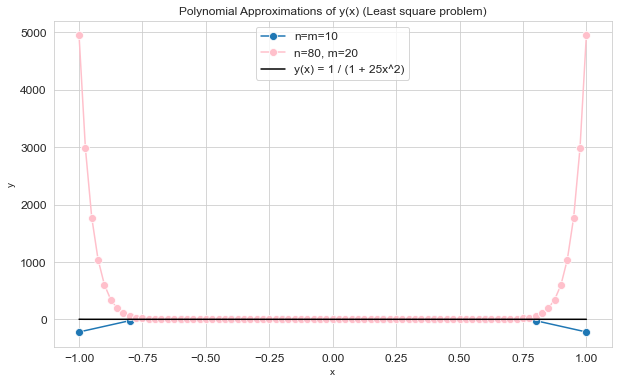

In [13]:
y_value=[]
x=11
for j in range(x):
    for i in range(x):
        P_x_j=least_squre(A(x-1,x-1),x-1,x-1)[i][0]*(x_i(x-1)[j]**i)
    y_value.append(P_x_j)
y_value_1=[]
for j in range(81):
    for i in range(21):
        P_x_j_1=least_squre(A(80,20),80,20)[i][0]*(x_i(80)[j]**i)
    y_value_1.append(P_x_j_1)
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(x_i(x-1), y_value, marker='o', markersize=8, label="n=m=10")
sns.lineplot(x_i(80), y_value_1, marker='o', markersize=8, color='pink', label="n=80, m=20")
sns.lineplot(x_i(100), y(100), color="black", label="y(x) = 1 / (1 + 25x^2)")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Polynomial Approximations of y(x) (Least square problem)")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.show()
